In [1]:
%matplotlib inline
from pprint import pprint
import itertools

from market import Returns_US_1871
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting as N_60
from withdrawal import InvertedWithdrawals, ConstantPercentage
from plot import plot_two

In [2]:
def sim(series):
    years = 30
    (r1, r2) = itertools.tee(series)
    x = simulate_withdrawals(r1, years=years, harvesting=N_60, withdraw=ConstantPercentage)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60, withdraw=InvertedWithdrawals)

    x_wr = [n.withdraw_r for n in x]
    x_portfolio = [n.portfolio_r for n in x]

    y_wr = [n.withdraw_r for n in y]
    y_portfolio = [(n.portfolio_r + n.withdraw_r) for n in y]
    return (x_wr, x_portfolio, y_wr, y_portfolio)


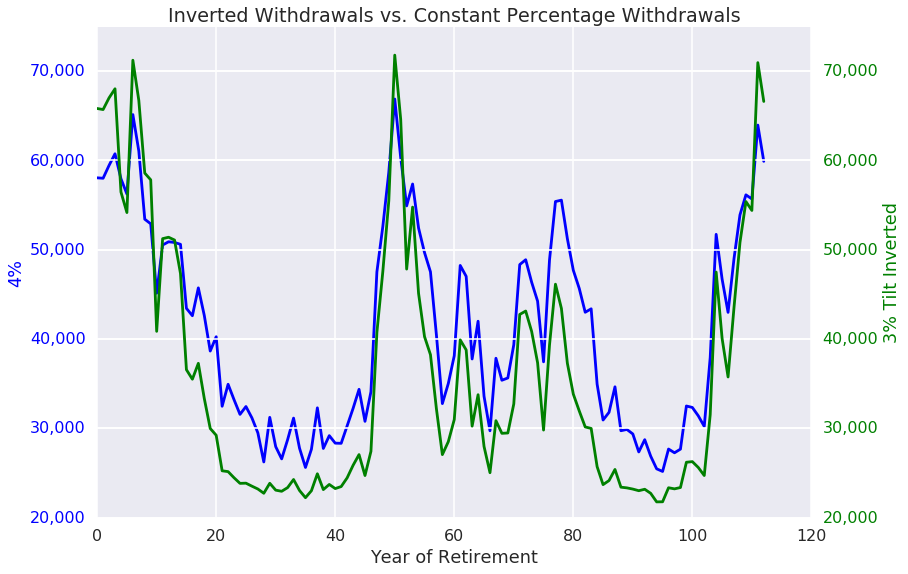

In [5]:
year = 1970
r = Returns_US_1871()
from metrics import cew

const_s = []
inv_s = []

for i in range(1871, 1871+113):
    y = sim(r.iter_from(i))
    const_s.append(cew(y[0]))
    inv_s.append(cew(y[2]))

plot_two(const_s, inv_s, s1_title='4%', s2_title='3% Tilt Inverted', x_label='Year of Retirement',
         title='Inverted Withdrawals vs. Constant Percentage Withdrawals',
         y_lim=(20000,75000))

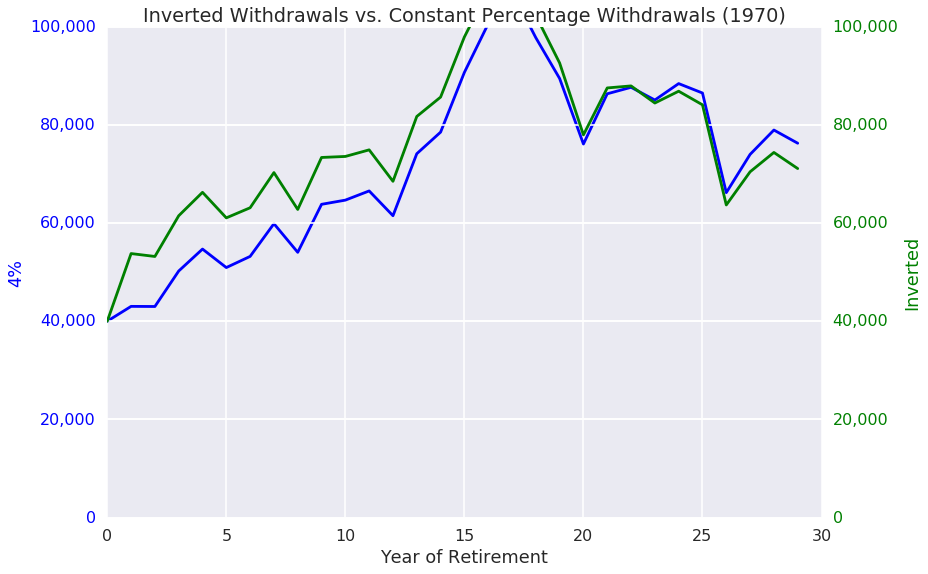

In [4]:
plot_two(y[0], y[2], s1_title='4%', s2_title='Inverted', x_label='Year of Retirement',
         title='Inverted Withdrawals vs. Constant Percentage Withdrawals (%s)' % year,
         y_lim=(0,100000))